# Sorting Data
- Most modern languages have sorting built in:
    - Bubble Sort
    - Merge Sort
    - Quick Sort


In [2]:
import time
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.size"] = 12

## The Bubble Sort
1. Begins by comparing first to elements to see which is larger.
    - If the first element is larger than the second, the two elements are swapped.
    - If the second element is larger than the first, the algorithm moves onto the next element.
2. The algorithm advances to the next element and performs the same comparison.
3. This process conmtinues until the largest number reaches the top of the array.
4. The process they starts again and pushes the next largest value to its correct position.

> The values "bubble" their way to the top of the array.

> Performance: **O(n<sup>2</sup>)**

- Very simple to understand and implement.
- Other sorting algorithms are generally much better.
- Not considered to be a practical solution.

Time taken to sort: 0.016ms


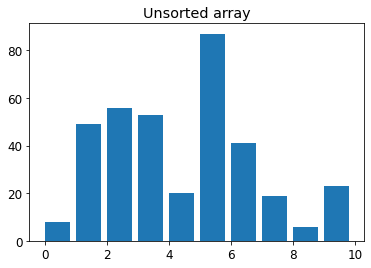

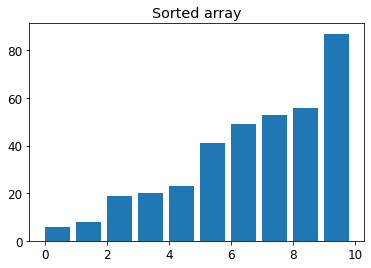

In [11]:
def bubbleSort(dataset):
    # Plot graph of unsorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(dataset), 1), dataset, align="edge", width=0.8)
    ax.set_title("Unsorted array")
    
    tic = time.time() # start time
    
    # TODO: start with the array length and decrement each time
    for i in range(len(dataset) - 1, 0, -1):
        for j in range(i):
            if dataset[j] > dataset[j+1]: # if current element is larger than the next element
                temp = dataset[j]
                dataset[j] = dataset[j+1] # swap elements
                dataset[j+1] = temp
               
        # print("Current state: ", dataset) # print array status
    
    toc = time.time() # end time
    diff = toc - tic
    print("Time taken to sort:", str(round(diff*1000, 3)) + "ms")

    # Plot graph of sorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(dataset), 1), dataset, align="edge", width=0.8)
    ax.set_title("Sorted array")

    
def main():
    list1 = [6, 20, 8, 19, 56, 23, 87, 41, 49, 53]
    list2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    np.random.seed(0) # randomness seed
    np.random.shuffle(list1) # randomly shuffle array
    
    bubbleSort(list1) # sort array
    # print("Result: ", list1) # print sorted array


if __name__ == "__main__":
    main()
    

## The Merge Sort
1. Break array down into smaller arrays until each array contains only one value.
2. When merging two arrays, place indexes at first elements in both arrays.
3. Insert smallest value into the merged array.
    - Advance the index of the array with the last submitted value.
4. Repeat comparison and insertion until one array expires.
    - Insert the rest of the remining array.

> This is a _divide and conquer_ algorithm.

> Performance: **O(n log n)**

- Usually used to merge two sorted arrays into one.
- Uses recursion to operate on datasets.
- Performs well on large datasets.

Time taken to sort: 0.027ms


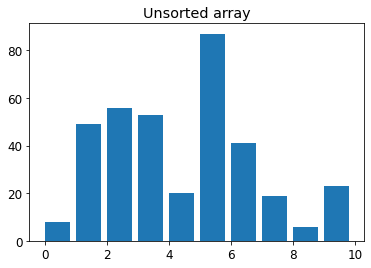

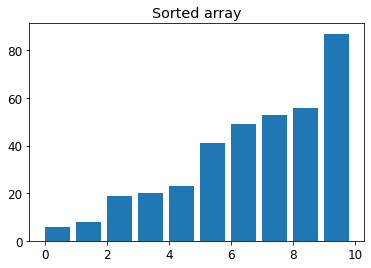

In [17]:
def mergesort(dataset):
    if len(dataset) > 1:
        mid = len(dataset) // 2
        leftarr = dataset[:mid]
        rightarr = dataset[mid:]

        # TODO: recursively break down the arrays
        mergesort(leftarr)
        mergesort(rightarr)

        # TODO: now perform the merging
        i=0 # index into the left array
        j=0 # index into the right array
        k=0 # index into merged array

        # TODO: while both arrays have content
        while i < len(leftarr) and j < len(rightarr):
            if leftarr[i] < rightarr[j]:
                dataset[k] = leftarr[i]
                i += 1
            else:
                dataset[k] = rightarr[j]
                j += 1
            k += 1

        # TODO: if the left array still has values, add them
        while i < len(leftarr):
            dataset[k] = leftarr[i]
            i += 1
            k += 1

        # TODO: if the right array still has values, add them
        while j < len(rightarr):
            dataset[k] = rightarr[j]
            j += 1
            k += 1


def main():
    items = [6, 20, 8, 19, 56, 23, 87, 41, 49, 53]
    
    np.random.seed(0) # randomness seed
    np.random.shuffle(items) # randomly shuffle array
    
    # Test the merge sort with data
    # Plot graph of unsorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(items), 1), items, align="edge", width=0.8)
    ax.set_title("Unsorted array")
    
    tic = time.time() # start time
    
    # print(items)
    mergesort(items)
    # print(items)
    
    toc = time.time() # end time
    diff = toc - tic
    print("Time taken to sort:", str(round(diff*1000, 3)) + "ms")

    # Plot graph of sorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(items), 1), items, align="edge", width=0.8)
    ax.set_title("Sorted array")

if __name__ == "__main__":
    main()
    

## The Quicksort
1. Select pivot value in dataset.
    - The purpose of this is to move values on the wrong side of the pivot value to the other side.
    - This is used to split the array and recursively repeat to sort.
2. Place lower index and upper index at either ends of array.
3. Compare lower index to pivot value.
    - If lower index is less than the pivot value, increment the lower index pointer.
    - If the lower index is more than the pivot value, stop incrementing the lower index pointer.
4. Compare higher index to the pivot value.
    - If the higher index is more than the pivot value, stop incrementing and swap the higher and lower index values.
    - If the higher index is less than the pivot value, continue to decrement the higher index.
5. When the indexed cross, the split point has been identified.
    - Split the array into two arrays at the split point.
    - Exchange the pivot value and the highest value in the pivot value's array.
    - The left array contains values less than the pivot value, and the right array contains values more than the pivot value.
6. Continue to recursively break down the arrays in this fashion, then rebuild the sorted array once finished.

> This is a _divide and conquer_ algorithm, like the merge sort.

> Performance: generally **O(n log n)**

> Worst-case performance: **O(n<sup>2</sup>)**

- Uses recursion to operate on datasets.
- Generally performs better and merge sort.
- Uses pivot-point selection to sort datasets.

Time taken to sort: 0.013ms


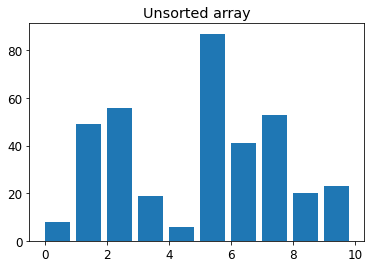

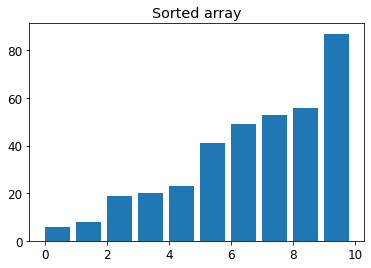

In [22]:
def quickSort(dataset, first, last):
    if first < last:
        # calculate the split point
        pivotIdx = partition(dataset, first, last)

        # now sort the two partitions
        quickSort(dataset, first, pivotIdx-1)
        quickSort(dataset, pivotIdx+1, last)


def partition(datavalues, first, last):
    # choose the first item as the pivot value
    pivotvalue = datavalues[first]
    # establish the upper and lower indexes
    lower = first + 1
    upper = last

    # start searching for the crossing point
    done = False
    while not done:
        # TODO: advance the lower index
        while lower <= upper and datavalues[lower] <= pivotvalue:
            lower += 1
        
        # TODO: advance the upper index
        while datavalues[upper] >= pivotvalue and upper >= lower:
            upper -= 1
        
        # TODO: if the two indexes cross, we have found the split point
        if upper < lower:
            done = True
        else:
            temp = datavalues[lower]
            datavalues[lower] = datavalues[upper]
            datavalues[upper] = temp

    # when the split point is found, exchange the pivot value
    temp = datavalues[first]
    datavalues[first] = datavalues[upper]
    datavalues[upper] = temp

    # return the split point index
    return upper

def main():
    items = [20, 6, 8, 53, 56, 23, 87, 41, 49, 19]
    
    np.random.seed(0) # randomness seed
    np.random.shuffle(items) # randomly shuffle array
    
    # Test the merge sort with data
    # Plot graph of unsorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(items), 1), items, align="edge", width=0.8)
    ax.set_title("Unsorted array")
    
    tic = time.time() # start time
    
    # test the merge sort with data
    # print(items)
    quickSort(items, 0, len(items)-1)
    # print(items)
    
    toc = time.time() # end time
    diff = toc - tic
    print("Time taken to sort:", str(round(diff*1000, 3)) + "ms")

    # Plot graph of sorted array
    fig, ax = plt.subplots()
    ax.bar(np.arange(0, len(items), 1), items, align="edge", width=0.8)
    ax.set_title("Sorted array")

if __name__ == "__main__":
    main()
